In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("bhp.csv")

***Exercise (Normal Distribution and Z Score for Outlier Removal)
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following***

***Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
After removing outliers in step 1, you get a new dataframe.
On step(2) dataframe, use 4 standard deviation to remove outliers
Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result***

In [2]:
data.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305


In [3]:
data.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [4]:
data.shape

(13200, 7)

 ***Remove outliers using percentile technique first. Use [0.001, 0.999]***

In [5]:
lower,upper=data.price_per_sqft.quantile([0.001, 0.999]) 

In [6]:
lower

1366.184

In [7]:
upper

50959.36200000098

In [8]:
data1=data[(data.price_per_sqft > lower) &  (data.price_per_sqft < upper)]

In [9]:
data1.shape

(13172, 7)

 ***use 4 standard deviation to remove outliers*** 

In [10]:
data1["z_score"]=(data1.price_per_sqft-data1.price_per_sqft.mean())/data1.price_per_sqft.std()

In [11]:
data1.shape

(13172, 8)

In [12]:
data3=data1[(data1.z_score >-4) & (data1.z_score <4)]

In [13]:
data3.shape

(13047, 8)

 **remove outliers Plot histogram for new dataframe** 

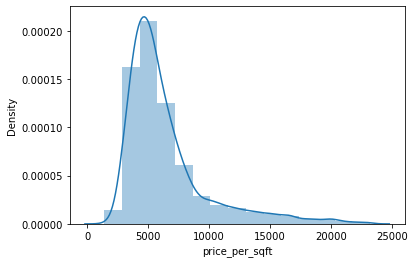

In [14]:

sns.distplot(data3.price_per_sqft,bins=15)

plt.show()

In [15]:
data3.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

***Also plot bell curve on same histogram On step(2) dataframe****

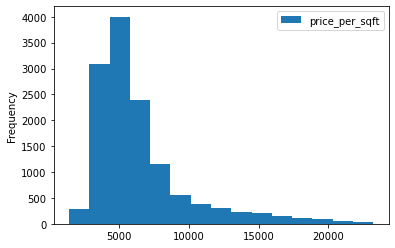

In [16]:
data3.price_per_sqft.plot(kind="hist",bins=15)
plt.legend()
plt.show()